### Data transformation and playing with parameters on vg sales dataset and basic deep learning

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [15]:
vg_sales = pd.read_csv('./cleaned_datasets/vg_sales_nonempty.csv', index_col=0)

In [19]:
vg_sales.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales
Rank,,,,,,,
20,Action,M,PS3,Rockstar Games,Rockstar North,9.4,17.21
21,Action,M,PS4,Rockstar Games,Rockstar North,9.7,16.37
31,Action,M,PS2,Rockstar Games,Rockstar North,9.6,14.37
41,Shooter,M,X360,Activision,Infinity Ward,8.7,13.49
42,Shooter,M,X360,Activision,Treyarch,8.8,13.60


In [17]:
to_drop = ['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'basename']

In [18]:
vg_sales.drop(to_drop, inplace=True, axis=1)

In [20]:
X = vg_sales.copy()
y = X.pop('Global_Sales')

### Preprocessing etc

In [21]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

In [23]:
X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

C:\Users\User\Desktop\programowanie_web_etc\python_projects\ml_projects\ml_basic\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [1254]


In [25]:
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253
0,1.583679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.795328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.724778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.089833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.160383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train-test-split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

#### Model

In [33]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [39]:
opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(
    optimizer=opt,
    loss='mae',
)

In [40]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
12/12 [==============================] - 1s 17ms/step - loss: 10.4003 - val_loss: 1.0363
Epoch 2/20
12/12 [==============================] - 0s 11ms/step - loss: 0.9371 - val_loss: 0.8841
Epoch 3/20
12/12 [==============================] - 0s 11ms/step - loss: 0.7093 - val_loss: 0.8397
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 0.6177 - val_loss: 0.8148
Epoch 5/20
12/12 [==============================] - 0s 11ms/step - loss: 0.5585 - val_loss: 0.7967
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.4986 - val_loss: 0.8017
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.5011 - val_loss: 0.8104
Epoch 8/20
12/12 [==============================] - 0s 11ms/step - loss: 0.4643 - val_loss: 0.7965
Epoch 9/20
12/12 [==============================] - 0s 10ms/step - loss: 0.4393 - val_loss: 0.7964
Epoch 10/20
12/12 [==============================] - 0s 11ms/step - loss: 0.4283 - val_loss: 0.7955
Epoch 11

<Axes: >

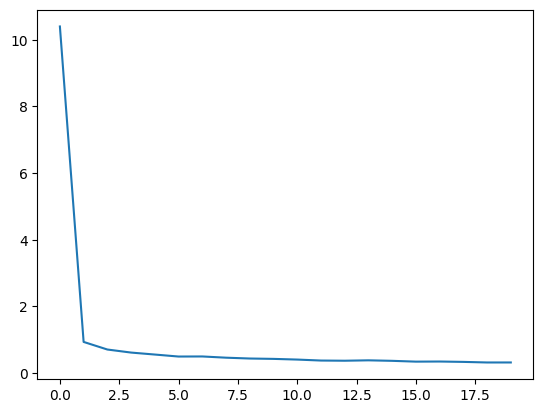

In [41]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()